In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('health_screenings_2020_1000ea.xlsx')

In [3]:
data6 = data.loc[:,['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]
data6.loc[data6['gender']==1,['gender']]='Male'
data6.loc[data6['gender']==2,['gender']]='Female'
data6.loc[data6['drinking']==0,['drinking']]='Non-drinking'
data6.loc[data6['drinking']==1,['drinking']]='Drinking'
data6.loc[(data6['smoking']==1) | (data6['smoking']==2),['smoking']]='Non-smoking'
data6.loc[data6['smoking']==3,['smoking']]='Smoking'

C:\Users\kimsy\AppData\Local\Temp\ipykernel_17776\345819579.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[data6['gender']==1,['gender']]='Male'
C:\Users\kimsy\AppData\Local\Temp\ipykernel_17776\345819579.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Non-drinking' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[data6['drinking']==0,['drinking']]='Non-drinking'
C:\Users\kimsy\AppData\Local\Temp\ipykernel_17776\345819579.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Non-smoking' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[(data6['smoking']==1) | (data6

In [5]:
drinking = data6.groupby(['gender', 'drinking'])['drinking'].count()
print(drinking)
smoking = data6.groupby(['gender', 'smoking'])['smoking'].count()
#drinking = drinking.to_frame(name='gender')
drinking = drinking.to_frame(name='count')
#print(drinking)
smoking = smoking.to_frame(name='count')
drinking = drinking.reset_index()
print(drinking)
smoking = smoking.reset_index()

gender  drinking    
Female  Drinking        213
        Non-drinking    305
Male    Drinking        356
        Non-drinking    126
Name: drinking, dtype: int64
   gender      drinking  count
0  Female      Drinking    213
1  Female  Non-drinking    305
2    Male      Drinking    356
3    Male  Non-drinking    126


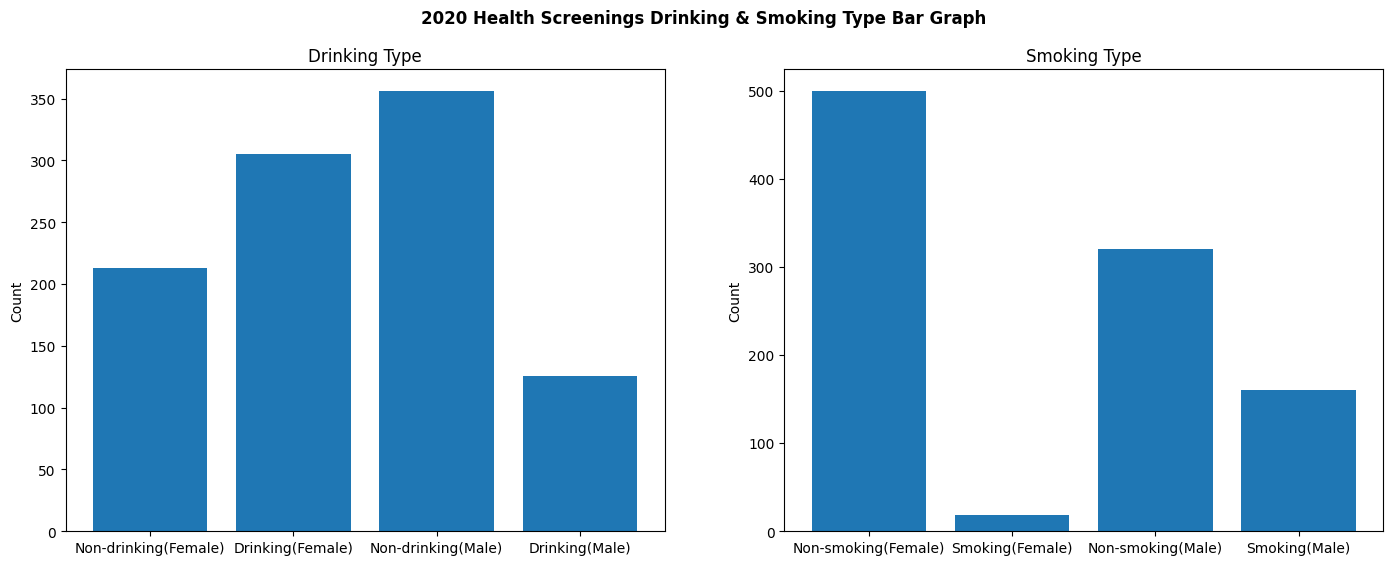

In [5]:
fig = plt.figure(figsize=(17,6))
fig.suptitle('2020 Health Screenings Drinking & Smoking Type Bar Graph',fontweight='bold')
index = np.arange(4)

fig.add_subplot(1,2,1)

plt.bar(index, drinking['count'])
plt.title('Drinking Type')
plt.ylabel('Count')
plt.xticks(index, ['Non-drinking(Female)','Drinking(Female)','Non-drinking(Male)','Drinking(Male)'])

fig.add_subplot(1,2,2)

plt.bar(index, smoking['count'])
plt.title('Smoking Type')
plt.ylabel('Count')
plt.xticks(index, ['Non-smoking(Female)', 'Smoking(Female)', 'Non-smoking(Male)', 'Smoking(Male)'])

plt.show()

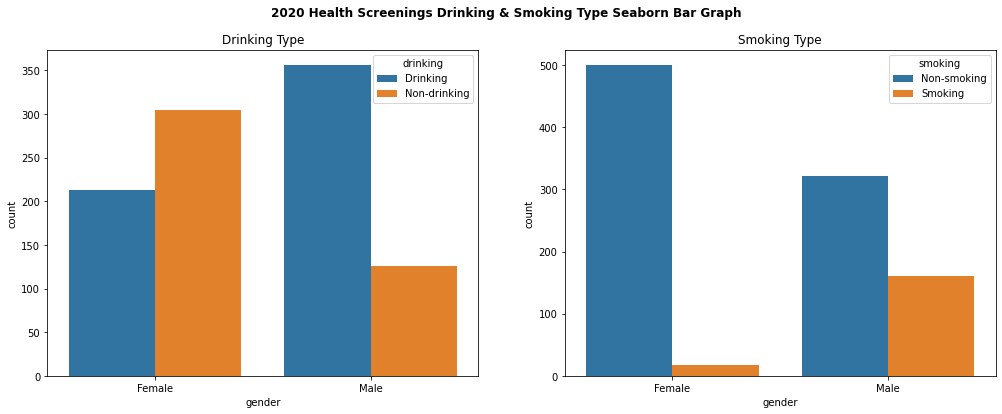

In [6]:
fig = plt.figure(figsize=(17,6))

area1 = fig.add_subplot(1,2,1)
area2 = fig.add_subplot(1,2,2)

ax1 = sns.barplot(data=drinking,x='gender',y='count',hue='drinking',ax=area1)
ax2 = sns.barplot(data=smoking,x='gender',y='count',hue='smoking',ax=area2)

fig.suptitle('2020 Health Screenings Drinking & Smoking Type Seaborn Bar Graph',fontweight='bold')
area1.set_title('Drinking Type')
area2.set_title('Smoking Type')

plt.show()

In [8]:
male_data = data6.loc[data6.gender=='Male',['gender','weight','waist','drinking','smoking']]
female_data = data6.loc[data6.gender=='Female',['gender','weight','waist','drinking','smoking']]

In [9]:
min(female_data['waist'])

53.0

In [10]:
max(male_data['waist'])

128.0

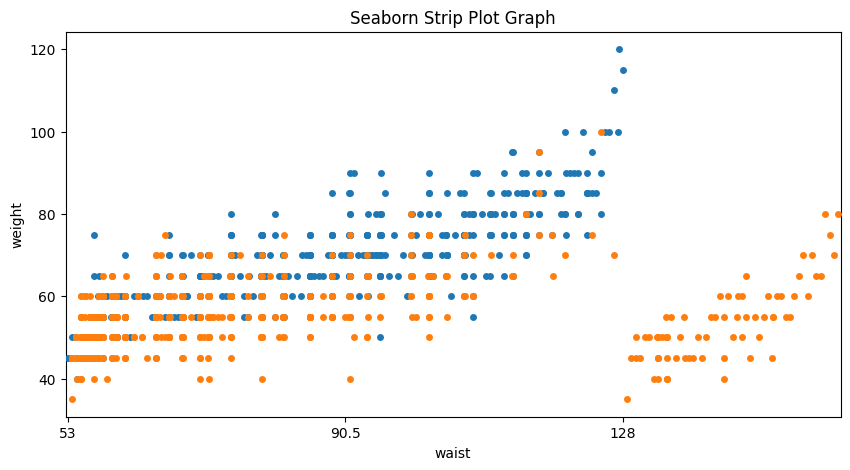

In [13]:
plt.figure(figsize=(10,5))
plt.title('Seaborn Strip Plot Graph')

sns.stripplot(data=male_data, x='waist', y='weight')
sns.stripplot(data=female_data, x='waist', y='weight', )
#sns.stripplot(data=data6, x='waist', y='weight', hue='gender')

plt.xticks(np.arange(0,127,63), labels=[53, 90.5, 128])
plt.show()

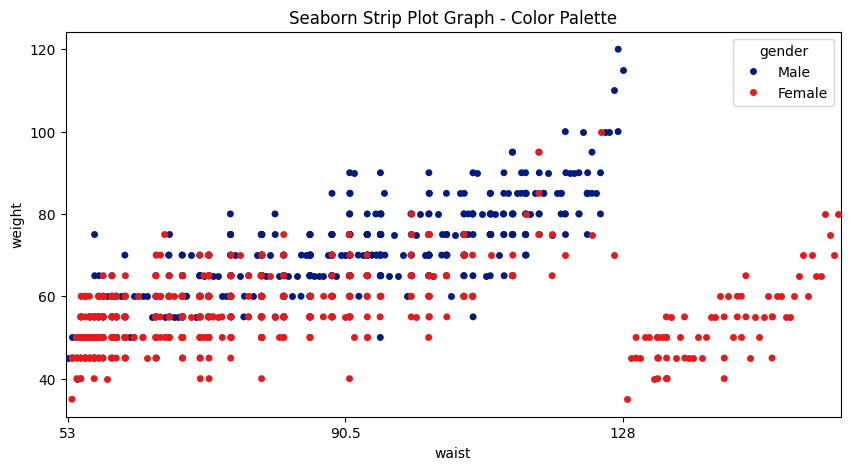

In [16]:
plt.figure(figsize=(10,5))
plt.title('Seaborn Strip Plot Graph - Color Palette')

sns.stripplot(data=male_data, x='waist', y='weight', hue='gender', palette='dark')
sns.stripplot(data=female_data, x='waist', y='weight', hue='gender', palette='Set1')

plt.xticks(np.arange(0,127,63), labels=[53, 90.5, 128])
plt.show()

In [12]:
male_data_100 = male_data.head(100)
female_data_100 = female_data.head(100)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


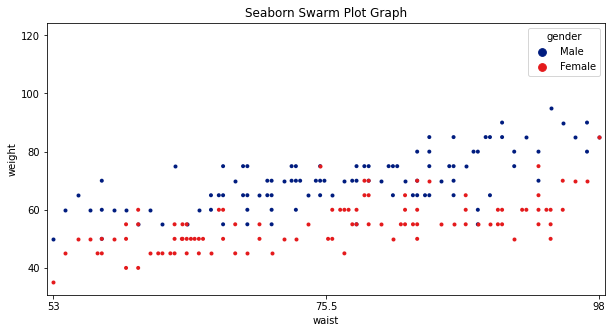

In [13]:
plt.figure(figsize=(10,5))
plt.title('Seaborn Swarm Plot Graph')

sns.swarmplot(data=male_data_100,x='waist',y='weight',hue='gender',palette='dark',size=4)
sns.swarmplot(data=female_data_100,x='waist',y='weight',hue='gender',palette='Set1',size=4)

plt.xticks(np.arange(0,46,22.5), labels=[53, 75.5, 98])
plt.show()

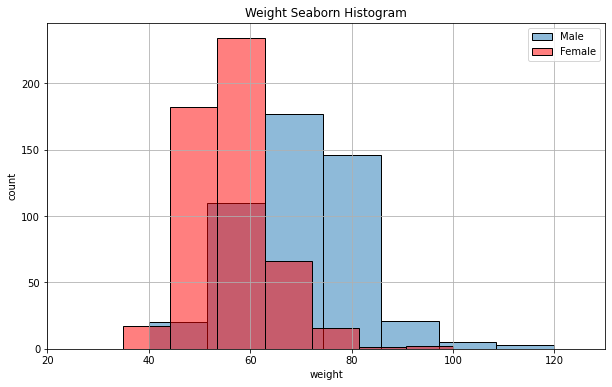

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(male_data['weight'], bins=7, alpha=0.5, label='Male')
sns.histplot(female_data['weight'], bins=7, alpha=0.5, label='Female', color='r')

plt.xlim(20,130)
plt.xlabel('weight')
plt.ylabel('count')
plt.title('Weight Seaborn Histogram')
plt.legend()
plt.grid()
plt.show()

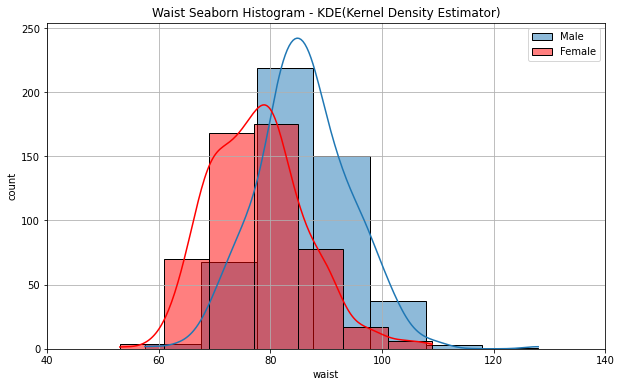

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(male_data['waist'], bins=7, alpha=0.5, label='Male', kde=True)
sns.histplot(female_data['waist'], bins=7, alpha=0.5, label='Female', color='r', kde=True)

plt.xlim(40,140)
plt.xlabel('waist')
plt.ylabel('count')
plt.title('Waist Seaborn Histogram - KDE(Kernel Density Estimator)')
plt.legend()
plt.grid()
plt.show()

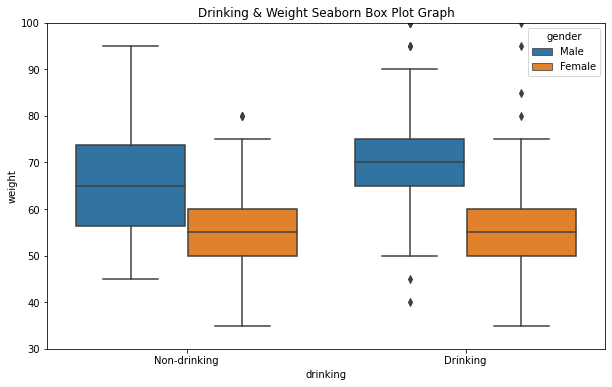

In [16]:
plt.figure(figsize=(10,6))
plt.title('Drinking & Weight Seaborn Box Plot Graph')

sns.boxplot(data=data6, x='drinking', y='weight', hue='gender')
plt.ylim(30,100)
plt.show()

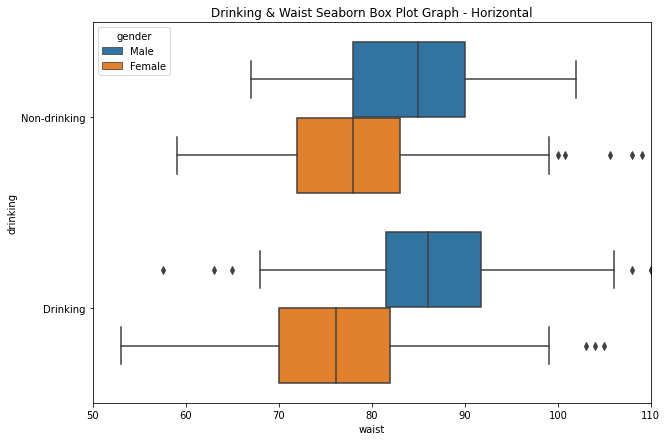

In [17]:
plt.figure(figsize=(10,7))
plt.title('Drinking & Waist Seaborn Box Plot Graph - Horizontal')

sns.boxplot(data=data6, x='waist', y='drinking', hue='gender', orient='h')
plt.xlim(50,110)
plt.show()

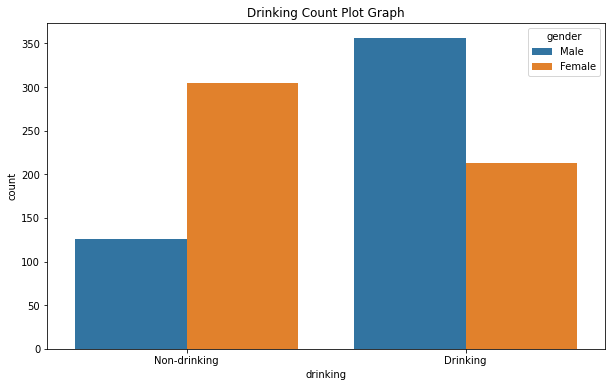

In [19]:
plt.figure(figsize=(10,6))
plt.title('Drinking Count Plot Graph')
sns.countplot(data=data6, x='drinking', hue='gender')
plt.show()

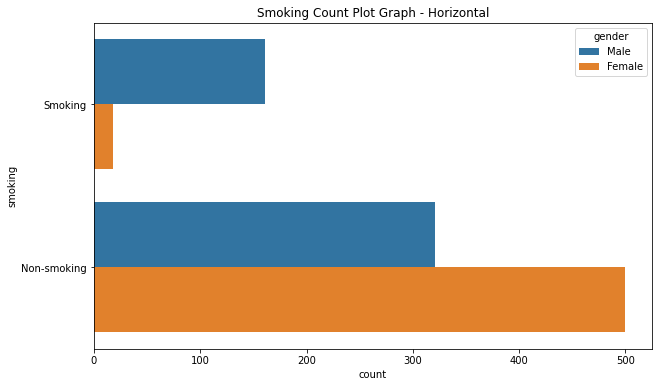

In [20]:
plt.figure(figsize=(10,6))
plt.title('Smoking Count Plot Graph - Horizontal')
sns.countplot(data=data6, y='smoking', hue='gender', order=['Smoking','Non-smoking'])
plt.show()

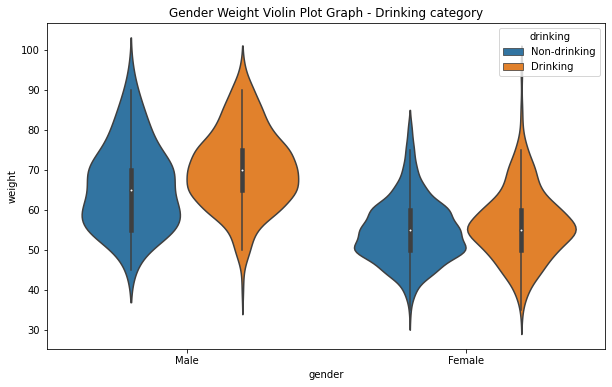

In [21]:
plt.figure(figsize=(10,6))
plt.title('Gender Weight Violin Plot Graph - Drinking category')
sns.violinplot(data=data6[data6.weight<100], x='gender', y='weight', hue='drinking')
plt.show()

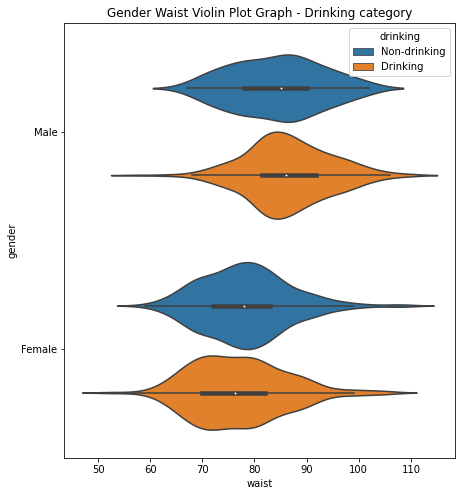

In [22]:
plt.figure(figsize=(7,8))
plt.title('Gender Waist Violin Plot Graph - Drinking category')
sns.violinplot(data=data6[data6.waist<120], y='gender', x='waist', hue='drinking')
plt.show()

In [7]:
data3 = data.loc[:,['gender','weight','waist']]
data8 = data.loc[:,['gender','weight','waist','drinking','smoking','cholesterol','HDL','LDL']]

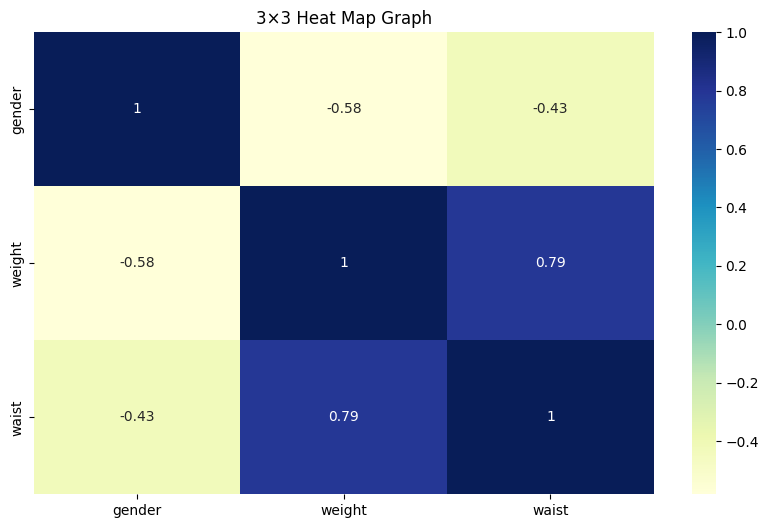

In [8]:
plt.figure(figsize=(10,6))
plt.title('3×3 Heat Map Graph')

correlation_data3 = data3.corr()
sns.heatmap(correlation_data3, annot=True, cmap='YlGnBu')
plt.show()

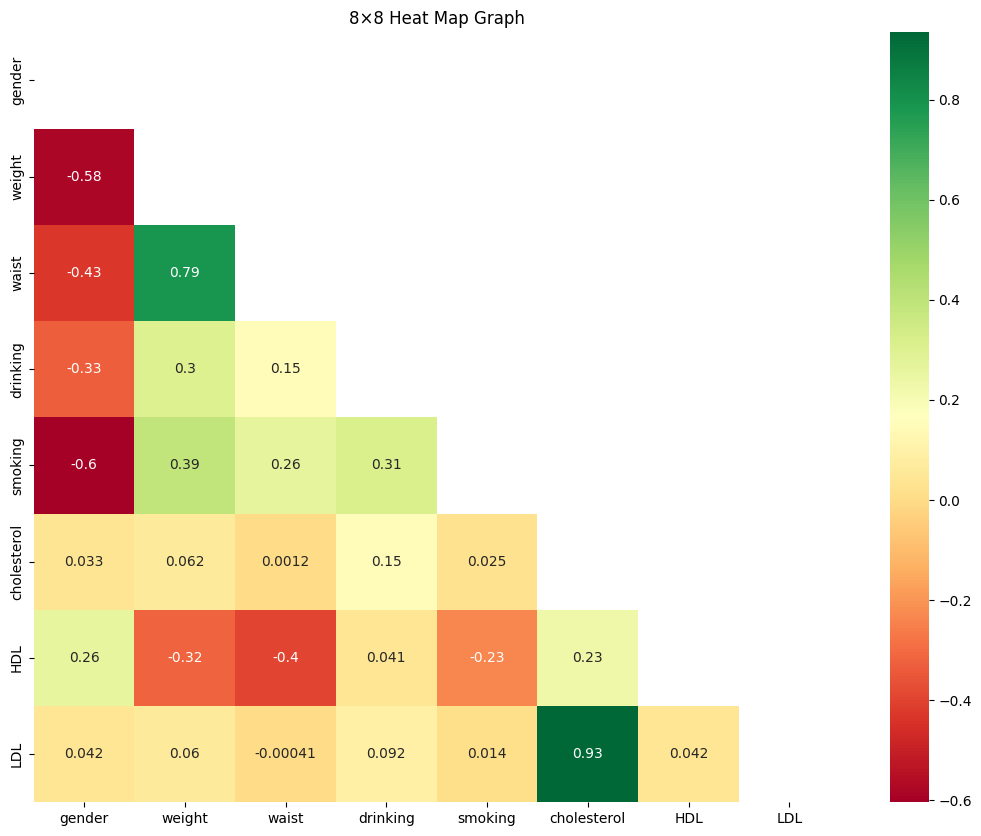

In [11]:
plt.figure(figsize=(13,10))
plt.title('8×8 Heat Map Graph')

correlation_data8= data8.corr()
upp_mat = np.triu(correlation_data8)

sns.heatmap(correlation_data8, annot=True, cmap='RdYlGn', mask=upp_mat)
plt.show()

In [27]:
data12 = data.loc[:,['gender','weight','waist','drinking','smoking','AST','ALT','systolic','diastolic','cholesterol','HDL','LDL']]

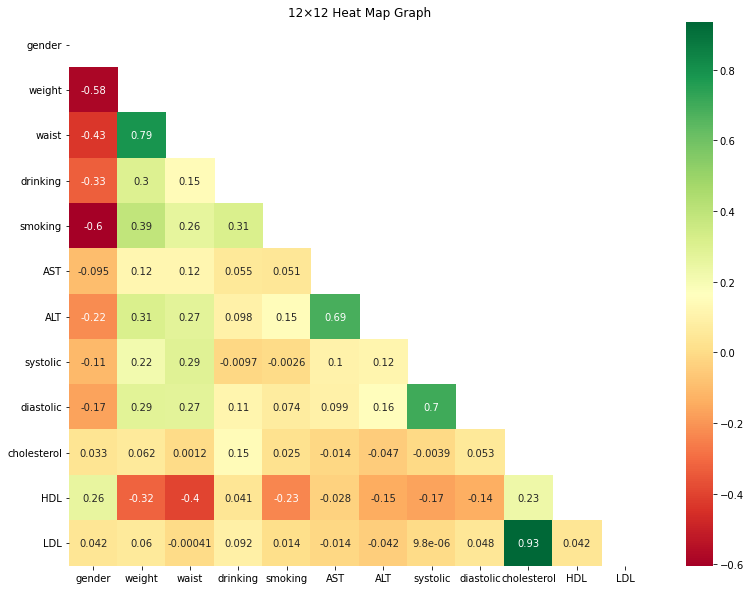

In [28]:
plt.figure(figsize=(13,10))
plt.title('12×12 Heat Map Graph')

correlation_data12= data12.corr()
upp_mat = np.triu(correlation_data12)

sns.heatmap(correlation_data12, annot=True, cmap='RdYlGn', mask=upp_mat)
plt.show()

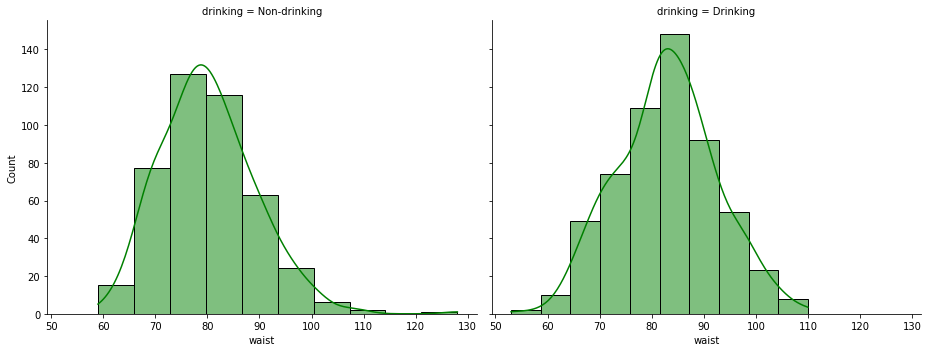

In [29]:
fg = sns.FacetGrid(data6, col='drinking', height=5, aspect=1.3)
fg.map(sns.histplot, 'waist', bins=10, color='g', kde=True)
plt.show()

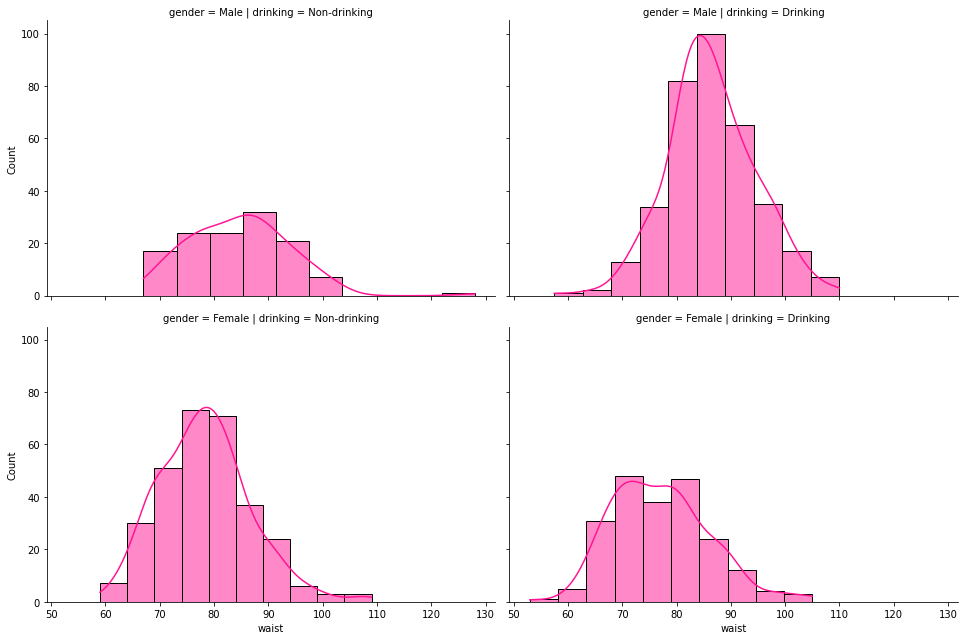

In [30]:
fg = sns.FacetGrid(data6, row='gender', col='drinking', height=4.5, aspect=1.5)
fg.map(sns.histplot, 'waist', bins=10, color='deeppink', kde=True)
plt.show()

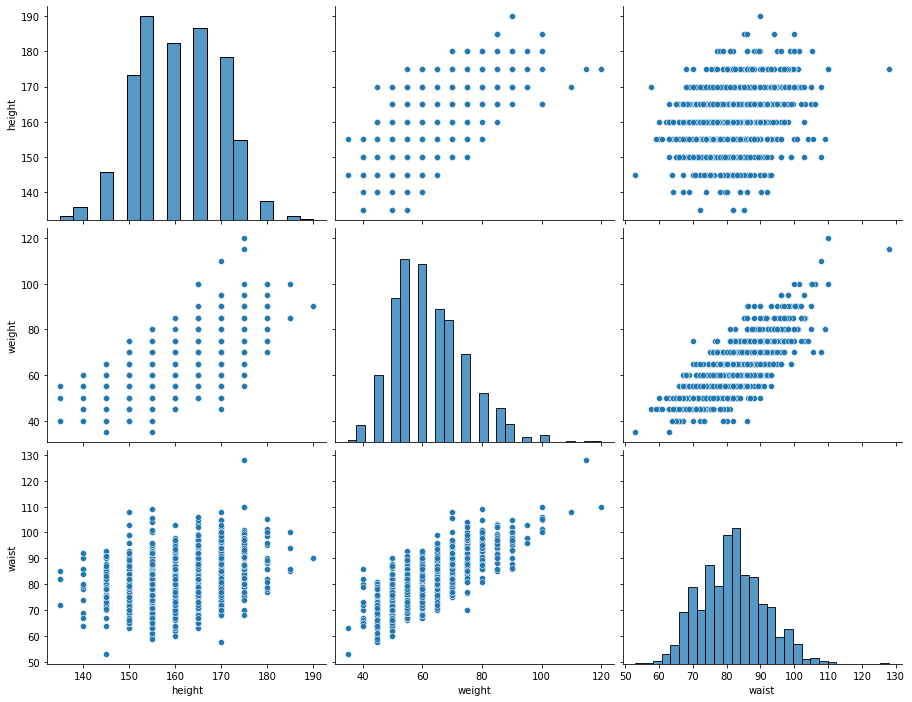

In [31]:
sns.pairplot(data6, height=3.3, aspect=1.3)
plt.show()

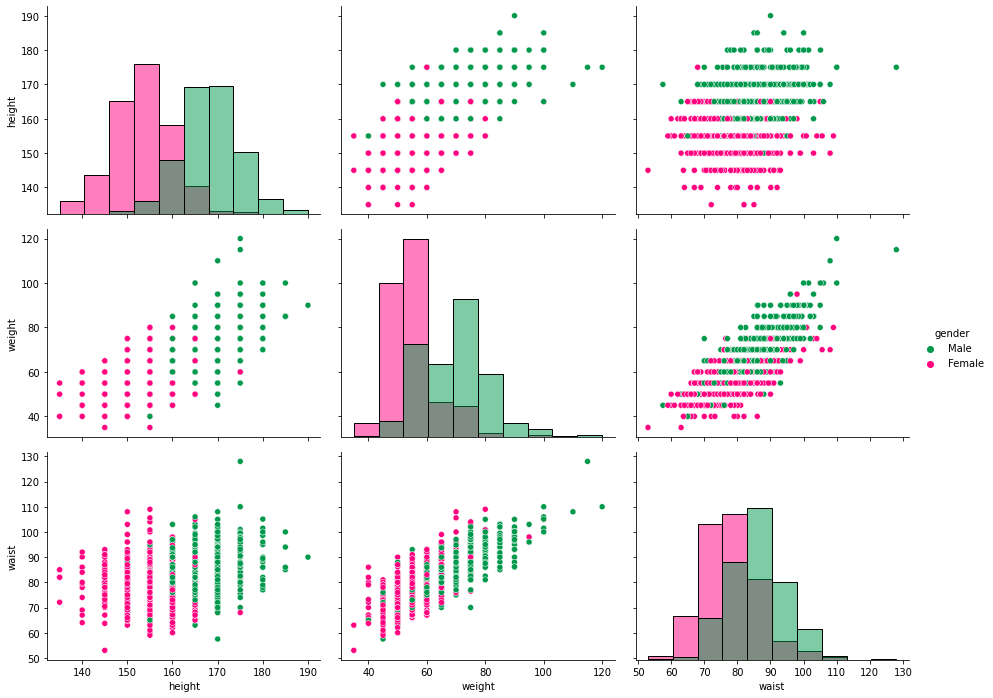

In [32]:
color = ['#00994C', '#FF007F']
pp = sns.PairGrid(data6, hue='gender', palette=color, height=3.3, aspect=1.3)
pp.map_diag(sns.histplot, bins=10)
pp.map_offdiag(sns.scatterplot)
pp.add_legend()
plt.show()